In [64]:
pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import fosforml
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [66]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [67]:
import seaborn as sns

In [68]:
my_session.connection.database

'ASSORTMENT_PLANNING'

In [69]:
my_session.connection.schema

'CPG_BRONZE'

In [70]:
table_name = "ASSORTMENT_PLANNING.CPG_BRONZE.SALES_CLEAN"

In [71]:
sf_df = my_session.sql("select * from {}".format(table_name))

In [72]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [73]:
df=sf_df.to_pandas()

In [74]:
df.dtypes

MNTH_CODE             int32
TRANS_DATE           object
START_DATE           object
SALES_VALUE         float64
SALES_UNITS           int16
SALES_VOLUME        float64
SALES_PTR_VALUE     float64
OC_CODE               int32
DISTRIBUTOR_CODE     object
OUTLET_CODE          object
CITY                 object
STATE                object
COUNTY               object
STREET               object
PRODUCT_CODE         object
CATEGORY             object
SUBCATEGORY          object
BRAND                object
dtype: object

In [75]:
df.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [76]:
df.shape

(966400, 18)

In [77]:
#How many % of missing values do we have for each feature?
missing_percentage = df.isnull().sum() / df.shape[0] * 100 
missing_percentage

MNTH_CODE           0.0
TRANS_DATE          0.0
START_DATE          0.0
SALES_VALUE         0.0
SALES_UNITS         0.0
SALES_VOLUME        0.0
SALES_PTR_VALUE     0.0
OC_CODE             0.0
DISTRIBUTOR_CODE    0.0
OUTLET_CODE         0.0
CITY                0.0
STATE               0.0
COUNTY              0.0
STREET              0.0
PRODUCT_CODE        0.0
CATEGORY            0.0
SUBCATEGORY         0.0
BRAND               0.0
dtype: float64

In [78]:
#no any transactions happened without distributer and no outliers/NULL in sales
df.loc[df.DISTRIBUTOR_CODE.isnull(), ["SALES_VOLUME", "SALES_UNITS"]].describe()

,SALES_VOLUME,SALES_UNITS
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [79]:
#no any transactions happened without distributer and no outliers in sales
df.loc[df.OUTLET_CODE.isnull(), ["SALES_VOLUME", "SALES_UNITS"]].describe()

,SALES_VOLUME,SALES_UNITS
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [80]:
df.OUTLET_CODE.nunique()

18833

In [81]:
df.DISTRIBUTOR_CODE.nunique()

5

In [82]:
#no negative sales happened
[df.describe()<0]

[       MNTH_CODE  SALES_VALUE  SALES_UNITS  SALES_VOLUME  SALES_PTR_VALUE  \
 count      False        False        False         False            False   
 mean       False        False        False         False            False   
 std        False        False        False         False            False   
 min        False        False        False         False            False   
 25%        False        False        False         False            False   
 50%        False        False        False         False            False   
 75%        False        False        False         False            False   
 max        False        False        False         False            False   
 
        OC_CODE  
 count    False  
 mean     False  
 std      False  
 min      False  
 25%      False  
 50%      False  
 75%      False  
 max      False  ]

In [83]:
df.isnull().sum()

MNTH_CODE           0
TRANS_DATE          0
START_DATE          0
SALES_VALUE         0
SALES_UNITS         0
SALES_VOLUME        0
SALES_PTR_VALUE     0
OC_CODE             0
DISTRIBUTOR_CODE    0
OUTLET_CODE         0
CITY                0
STATE               0
COUNTY              0
STREET              0
PRODUCT_CODE        0
CATEGORY            0
SUBCATEGORY         0
BRAND               0
dtype: int64

In [84]:
df.duplicated().sum()

3158

In [85]:
df.corr(numeric_only=True)

,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE
MNTH_CODE,1.000000,-0.007954,-0.011117,-0.005767,-0.007843,-0.791833
SALES_VALUE,-0.007954,1.000000,0.331870,0.925910,0.996460,0.005674
SALES_UNITS,-0.011117,0.331870,1.000000,0.427627,0.334911,0.013232
SALES_VOLUME,-0.005767,0.925910,0.427627,1.000000,0.927547,0.004323
SALES_PTR_VALUE,-0.007843,0.996460,0.334911,0.927547,1.000000,0.006129
OC_CODE,-0.791833,0.005674,0.013232,0.004323,0.006129,1.000000


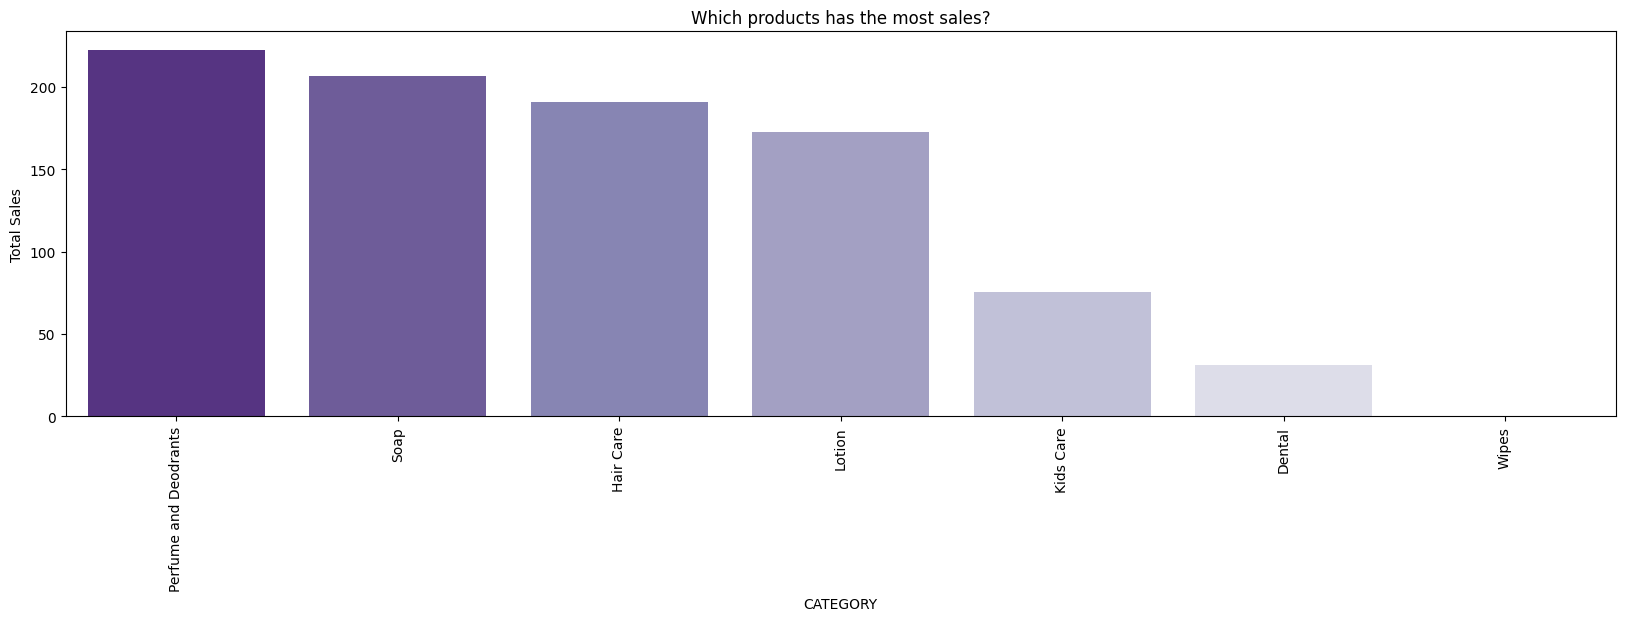

In [86]:

# Group by description and sum the sales
productby_sales = df.groupby('CATEGORY')['SALES_VOLUME'].sum().sort_values(ascending=False).iloc[0:30]

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(x=productby_sales.index, y=productby_sales.values, palette="Purples_r")
plt.ylabel("Total Sales")
plt.title("Which products has the most sales?")
plt.xticks(rotation=90)
plt.show()


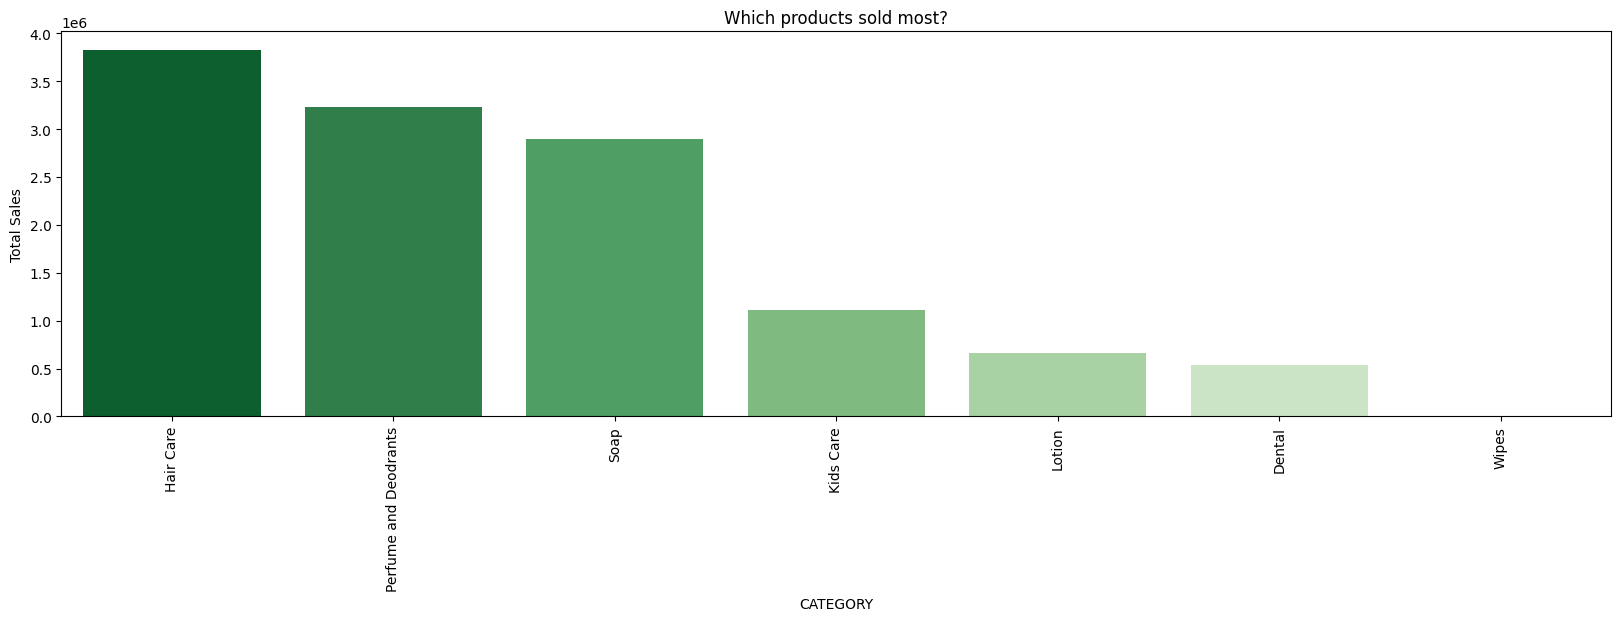

In [87]:

# Group by description and sum the sales
productby_qty = df.groupby('CATEGORY')['SALES_UNITS'].sum().sort_values(ascending=False).iloc[0:30]

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(x=productby_qty.index, y=productby_qty.values, palette="Greens_r")
plt.ylabel("Total Sales")
plt.title("Which products sold most?")
plt.xticks(rotation=90)
plt.show()


In [88]:
df.COUNTY.nunique()

9

In [89]:
# Find unique dates
df['TRANS_DATE'].nunique()

303

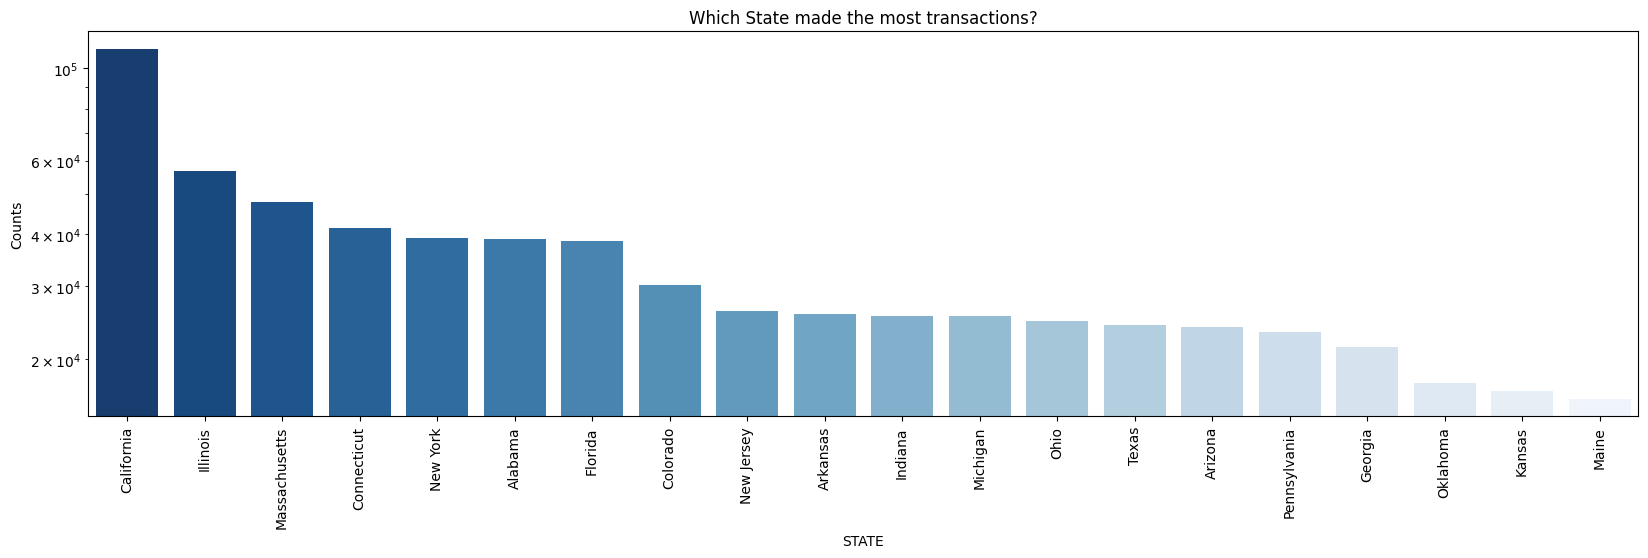

In [90]:
state_counts = df.STATE.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="Blues_r")
plt.ylabel("Counts")
plt.title("Which State made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [91]:
#How many percentage of transactions happened in california
df.loc[df.STATE=="California"].shape[0] / df.shape[0] * 100

11.530111754966887

In [92]:
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [93]:
# Create features from date column
df['YEAR'] = df['TRANS_DATE'].dt.year
df['MONTH'] = df['TRANS_DATE'].dt.month
df['DAY'] = df['TRANS_DATE'].dt.day
df['DAY_OF_WEEK'] = df['TRANS_DATE'].dt.day_of_week + 1 # Monday is 1 and sunday is 7
df['QUARTER'] = df['TRANS_DATE'].dt.quarter
df['DAY_OF_YEAR'] = df['TRANS_DATE'].dt.dayofyear

In [94]:
df.describe()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,YEAR,MONTH,DAY,DAY_OF_WEEK,QUARTER,DAY_OF_YEAR
count,966400.000000,966400,966400,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000
mean,202372.876450,2024-03-01 03:47:10.976821504,2024-02-14 23:17:36.278145536,446.417454,12.696476,0.000931,457.814679,202206.573263,2023.663032,6.557728,15.405579,4.324140,2.513462,184.151133
min,202309.000000,2023-08-29 00:00:00,2023-08-28 00:00:00,2.860000,1.000000,0.000011,1.785714,202201.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,202312.000000,2023-11-30 00:00:00,2023-11-27 00:00:00,140.000000,2.000000,0.000368,142.857143,202204.000000,2023.000000,4.000000,8.000000,3.000000,2.000000,97.000000
50%,202403.000000,2024-03-03 00:00:00,2024-02-27 00:00:00,192.240000,6.000000,0.000448,198.181818,202207.000000,2024.000000,7.000000,15.000000,5.000000,3.000000,186.000000
75%,202406.000000,2024-06-04 00:00:00,2024-05-29 00:00:00,450.000000,16.000000,0.000900,450.000000,202209.000000,2024.000000,9.000000,23.000000,6.000000,3.000000,271.000000
max,202408.000000,2024-08-27 00:00:00,2024-07-31 00:00:00,145728.120000,10240.000000,0.275500,151800.000000,202212.000000,2024.000000,12.000000,31.000000,7.000000,4.000000,365.000000
std,44.525843,NaN,NaN,1053.355633,40.761336,0.002063,1101.769102,3.404526,0.472674,3.399272,8.632029,1.952907,1.100524,103.703252


In [95]:
df_unique = df.drop_duplicates()

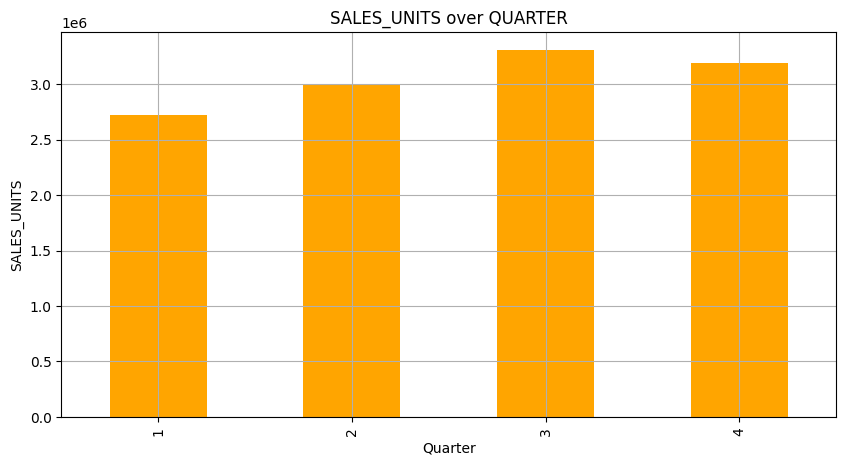

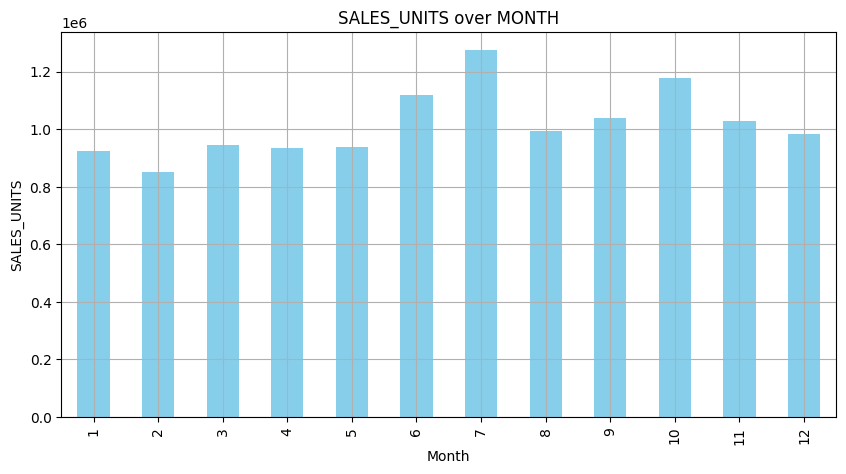

In [96]:
import matplotlib.pyplot as plt

# Plot SALES_UNITS over QUARTER
plt.figure(figsize=(10, 5))
df_unique.groupby('QUARTER')['SALES_UNITS'].sum().plot(kind='bar', color='orange')
plt.title('SALES_UNITS over QUARTER')
plt.xlabel('Quarter')
plt.ylabel('SALES_UNITS')
plt.grid(True)
plt.show()

# Plot SALES_UNITS over MONTH
plt.figure(figsize=(10, 5))
df_unique.groupby('MONTH')['SALES_UNITS'].sum().plot(kind='bar', color='skyblue')
plt.title('SALES_UNITS over MONTH')
plt.xlabel('Month')
plt.ylabel('SALES_UNITS')
plt.grid(True)
plt.show()


In [97]:
#most products are sold in quantities from 1 to 16
df.SALES_UNITS.describe()

count    966400.000000
mean         12.696476
std          40.761336
min           1.000000
25%           2.000000
50%           6.000000
75%          16.000000
max       10240.000000
Name: SALES_UNITS, dtype: float64

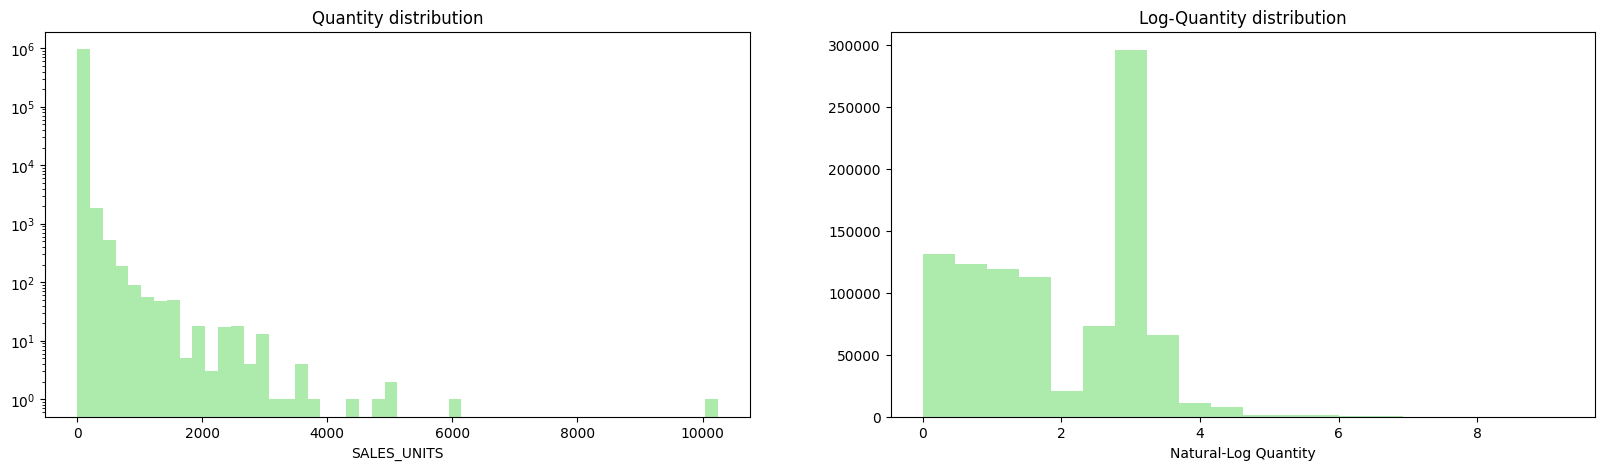

In [98]:
#uniform distribution
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.SALES_UNITS, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.SALES_UNITS), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

In [99]:
import datetime
      
startdate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()

In [100]:
import pandas as pd

# Define the dates as strings
startdate_str = '2024-01-01'  # Replace with your actual start date
enddate_str = '2023-08-29'    # Replace with your actual end date

# Convert the strings to datetime objects
startdate = pd.to_datetime(startdate_str)
enddate = pd.to_datetime(enddate_str)

# Split the dataset into train and test dataset
df_test = df[df['TRANS_DATE'] > startdate] #1 month
df_train = df[df['TRANS_DATE'] <= enddate] # 11 month


In [101]:
df_train.shape

(3014, 24)

In [102]:
df_test.shape

(640754, 24)

In [103]:
df_train.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,...,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND,YEAR,MONTH,DAY,DAY_OF_WEEK,QUARTER,DAY_OF_YEAR
29638,202309,2023-08-29,2023-08-28,137.14,16,0.000272,142.857143,202209,DB0110,OL175953,...,PRD0028,Soap,Toilet Soap,Indigo,2023,8,29,2,3,241
29642,202309,2023-08-29,2023-08-28,140.00,16,0.000384,142.857143,202209,DB0655,OL222650,...,PRD0106,Hair Care,Shampoo,Hair & Shoulders,2023,8,29,2,3,241
29650,202309,2023-08-29,2023-08-28,271.43,32,0.000544,285.714286,202209,DB0706,OL113014,...,PRD0028,Soap,Toilet Soap,Indigo,2023,8,29,2,3,241
29651,202309,2023-08-29,2023-08-28,52.50,12,0.000132,53.571429,202209,DB0110,OL238726,...,PRD0058,Soap,Liquid Soap,Rust,2023,8,29,2,3,241
29652,202309,2023-08-29,2023-08-28,172.73,1,0.000250,172.727273,202209,DB0110,OL10696,...,PRD0122,Perfume and Deodrants,Female Deodrant,Lilac,2023,8,29,2,3,241


In [104]:
X_train = df_train.drop(labels=['MNTH_CODE','TRANS_DATE','START_DATE','SALES_PTR_VALUE','OC_CODE',
'DISTRIBUTOR_CODE','OUTLET_CODE','CITY','STATE','COUNTY','STREET','PRODUCT_CODE','CATEGORY','SUBCATEGORY','BRAND','DAY','DAY_OF_WEEK','DAY_OF_YEAR'],axis=1)
y_train = df_train.SALES_UNITS

X_test = df_train.drop(labels=['MNTH_CODE','TRANS_DATE','START_DATE','SALES_PTR_VALUE','OC_CODE',
'DISTRIBUTOR_CODE','OUTLET_CODE','CITY','STATE','COUNTY','STREET','PRODUCT_CODE','CATEGORY','SUBCATEGORY','BRAND','DAY','DAY_OF_WEEK','DAY_OF_YEAR'],axis=1)
y_test = df_train.SALES_UNITS



In [105]:
X_train.keys()

Index(['SALES_VALUE', 'SALES_UNITS', 'SALES_VOLUME', 'YEAR', 'MONTH',
       'QUARTER'],
      dtype='object')

In [106]:
X_test.keys()

Index(['SALES_VALUE', 'SALES_UNITS', 'SALES_VOLUME', 'YEAR', 'MONTH',
       'QUARTER'],
      dtype='object')

In [107]:
score = pd.DataFrame()
score.index.name = 'Scoring'
score['Training+Test Time(sec)'] = None
time_Frame = []

In [108]:
# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check the first few rows of X_train and y_train
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())


X_train shape: (3014, 6)
y_train shape: (3014,)
X_train head:
        SALES_VALUE  SALES_UNITS  SALES_VOLUME  YEAR  MONTH  QUARTER
29638       137.14           16      0.000272  2023      8        3
29642       140.00           16      0.000384  2023      8        3
29650       271.43           32      0.000544  2023      8        3
29651        52.50           12      0.000132  2023      8        3
29652       172.73            1      0.000250  2023      8        3
y_train head:
 29638    16
29642    16
29650    32
29651    12
29652     1
Name: SALES_UNITS, dtype: int16


In [109]:
df.dtypes

MNTH_CODE                    int32
TRANS_DATE          datetime64[ns]
START_DATE          datetime64[ns]
SALES_VALUE                float64
SALES_UNITS                  int16
SALES_VOLUME               float64
SALES_PTR_VALUE            float64
OC_CODE                      int32
DISTRIBUTOR_CODE            object
OUTLET_CODE                 object
CITY                        object
STATE                       object
COUNTY                      object
STREET                      object
PRODUCT_CODE                object
CATEGORY                    object
SUBCATEGORY                 object
BRAND                       object
YEAR                         int32
MONTH                        int32
DAY                          int32
DAY_OF_WEEK                  int32
QUARTER                      int32
DAY_OF_YEAR                  int32
dtype: object

In [110]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
#data splitting

X_train shape: (3014, 6)
y_train shape: (3014,)
X_test shape: (3014, 6)
y_test shape: (3014,)


In [111]:
#verify data loading
print("First few rows of X_train:\n", X_train[:5])
print("First few rows of y_train:\n", y_train[:5])

First few rows of X_train:
        SALES_VALUE  SALES_UNITS  SALES_VOLUME  YEAR  MONTH  QUARTER
29638       137.14           16      0.000272  2023      8        3
29642       140.00           16      0.000384  2023      8        3
29650       271.43           32      0.000544  2023      8        3
29651        52.50           12      0.000132  2023      8        3
29652       172.73            1      0.000250  2023      8        3
First few rows of y_train:
 29638    16
29642    16
29650    32
29651    12
29652     1
Name: SALES_UNITS, dtype: int16


In [112]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
%time regressor.fit(X_train, y_train)
%time regressor.fit(X_test, y_test)
y_pred_train = regressor.predict(X_train)
print('Train RSME :', np.sqrt(mean_squared_error(y_train, y_pred_train)))


y_pred_test = regressor.predict(X_test)
print('Test RSME :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

CPU times: user 100 ms, sys: 7.23 ms, total: 107 ms
Wall time: 946 ms
CPU times: user 88.1 ms, sys: 0 ns, total: 88.1 ms
Wall time: 88.3 ms
Train RSME : 0.34920252307711663
Test RSME : 0.34920252307711663


In [113]:
df.columns

Index(['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'QUARTER', 'DAY_OF_YEAR'],
      dtype='object')

In [133]:
df.dtypes

MNTH_CODE                   int32
TRANS_DATE         datetime64[ns]
START_DATE         datetime64[ns]
SALES_VALUE               float64
SALES_UNITS                 int16
SALES_VOLUME              float64
SALES_PTR_VALUE           float64
OC_CODE                     int32
YEAR                        int32
MONTH                       int32
DAY                         int32
DAY_OF_WEEK                 int32
QUARTER                     int32
DAY_OF_YEAR                 int32
dtype: object

In [145]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(object)
        print (df[x].dtypes)

In [151]:
df.dtypes
for y in df:
    if df[y].dtypes == "float64":
        df[y] = df[y].astype(object)
        print (df[y].dtypes)

object
object
object


In [152]:

df=df.fillna(df.mean())
X = df.drop('SALES_VOLUME',axis=1)
y = df['SALES_VOLUME']

In [153]:
df.columns

Index(['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'QUARTER', 'DAY_OF_YEAR'],
      dtype='object')

In [154]:
df=df.fillna(df.mean())
X = df.drop('SALES_VOLUME',axis=1)
y = df['SALES_VOLUME']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [156]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int16DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [ ]:
#less than 1 percent of the mean of all the values in the ‘sales_volume’ column
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#Accuracy of the prediction
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

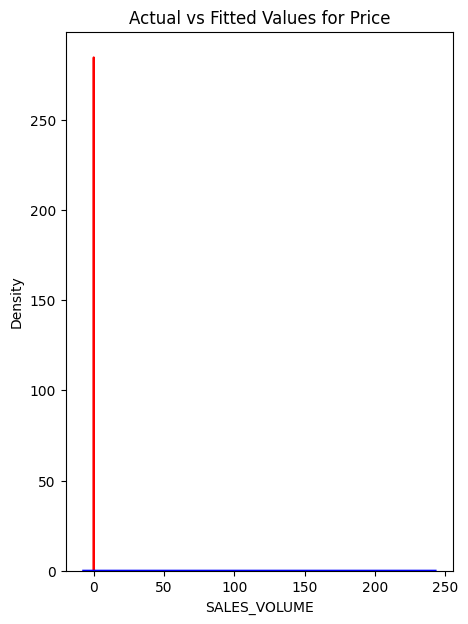

In [126]:
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [127]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

ModuleNotFoundError: No module named 'pydot'